In [1]:
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

from AWS_MRCNN import alc_train
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "AWS_MRCNN/logs")
BALLON_WEIGHTS_PATH = os.path.join(ROOT_DIR, "AWS_MRCNN/logs/alochol20201110T0924/mask_rcnn_alochol_0029.h5") 

/Users/tengluntan/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/tengluntan/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/tengluntan/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/tengluntan/opt/

In [28]:
import skimage.io
DEVICE = "/cpu:0"
TEST_MODE = "inference"
config = alc_train.AlcoholConfig()
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)
weights_path = BALLON_WEIGHTS_PATH
#Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  /Users/tengluntan/Desktop/AWS_MRCNN/logs/alochol20201110T0924/mask_rcnn_alochol_0029.h5
Re-starting from epoch 29


['8.jpg', '9.jpg', '14.jpg', '15.jpg', '17.jpg', '16.jpg', '12.jpg', '13.jpg', '11.jpg', '10.jpg', '18.jpg', '19.jpg', '4.jpg', '5.jpg', '7.jpg', 'TeamViewer.dmg', '6.jpg', '2.jpg', '3.jpg', '1.jpg', '0.jpg']
Processing 1 images
image                    shape: (1280, 1280, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 17)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


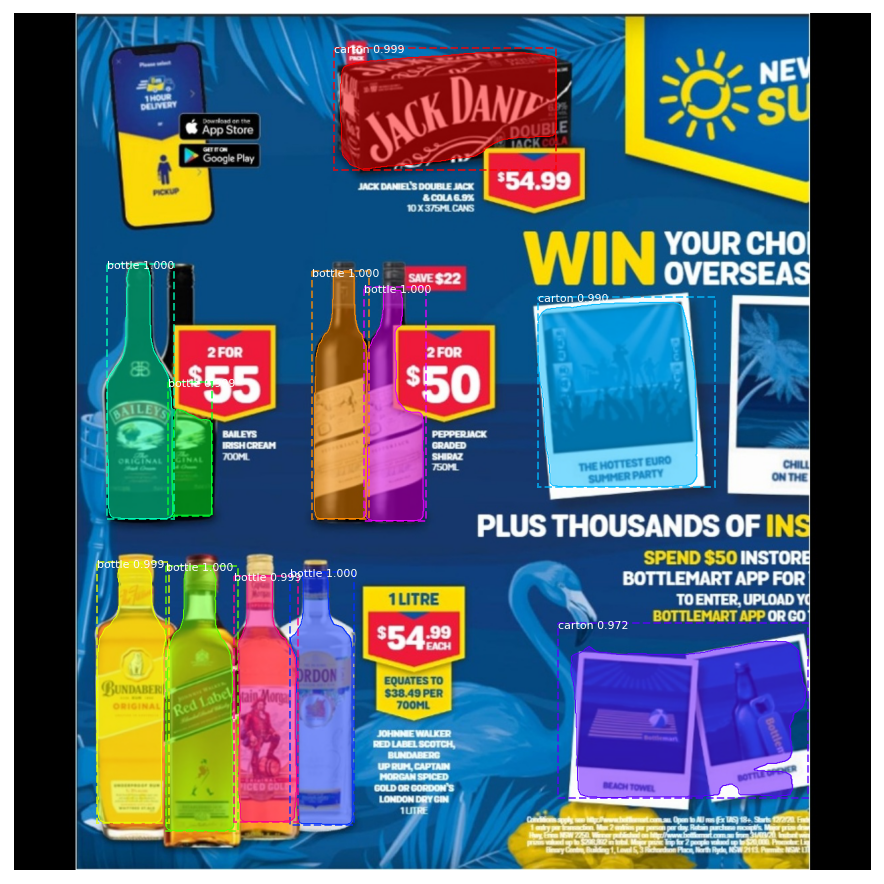

In [29]:
IMAGE_DIR = os.path.join(ROOT_DIR, "AWS_MRCNN/alcohol/val") 
file_names = next(os.walk(IMAGE_DIR))[2]
print(file_names)
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
class_names = ['can', 'bottle', 'carton', 'label']
# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])